<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Jhee/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.7 MB/s eta 0:00:00


In [2]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [3]:
#Select the frim for the prediction
firm = "NFLX"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [4]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

# Data Collection

### Stock Price

In [5]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

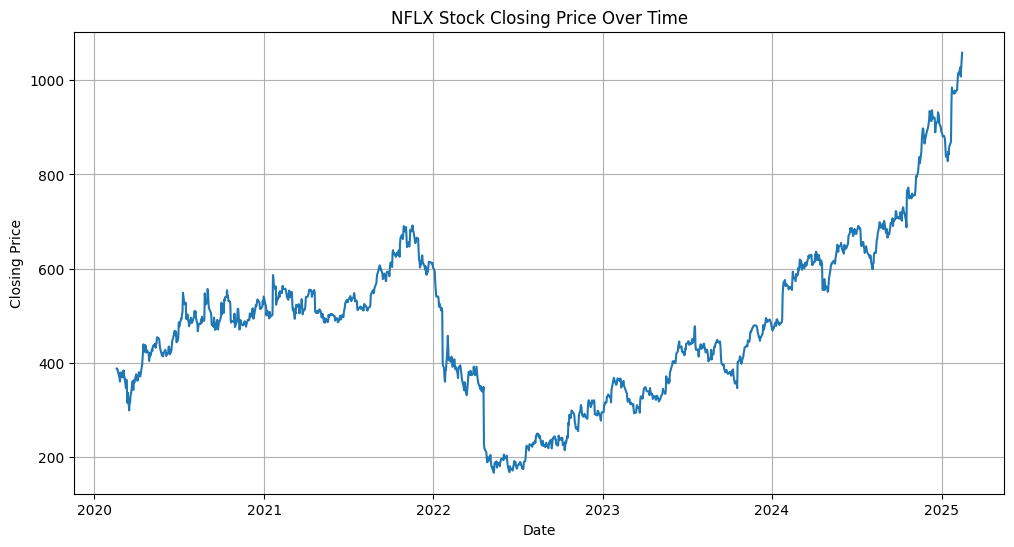

In [ ]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [ ]:
!pip install fredapi

In [7]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


ModuleNotFoundError: No module named 'fredapi'

### Microeconomic Indicators

In [8]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

""


In [9]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

[]

### Sentiment Analysis

##### yhfinance web scrapping

In [10]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [11]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,3 hours ago,Dow Jones Futures: S&P 500 Hits High In Late R...,"The S&P 500 hit a new high, led by growth, eve..."
1,10 hours ago,"Palantir, Netflix Lead 26 'Perfect' Stocks. Se...",As AI continues to boost firms across industri...
2,13 hours ago,Is Netflix (NFLX) the Most Profitable Tech Sto...,We recently published a list of 10 Most Profit...
3,17 hours ago,Exploring Three High Growth Tech Stocks In The...,"In the last week, the United States market has..."
4,18 hours ago,Ryan Serhant Closed The Biggest Deal Of His Ca...,In a career that constantly seems to be scalin...
5,yesterday,"Netflix, Inc. (NFLX): Among the Best Streaming...",We recently compiled a list of the 12 Best Str...
6,yesterday,Why Netflix and Amazon will dominate live sports,Streaming platforms are poised to capture mark...
7,3 days ago,"Jim Cramer Says Netflix, Inc. (NFLX) Is ‘Going...",We recently compiled a list of the Jim Cramer ...
8,3 days ago,When a Lifetime Subscription Can Save You Mone...,Fed up with spending too much on subscriptions...
9,3 days ago,Netflix's (NASDAQ:NFLX) five-year earnings gro...,The most you can lose on any stock (assuming y...


In [ ]:
# Test code

import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import pandas as pd  # Handling structured data
import datetime  # For date filtering
import random  # For random sampling
import time  # Prevent Reddit rate-limiting

nest_asyncio.apply()  # Preventing async loop errors

# ✅ Stock-related keywords
firm_keywords = {
    "Apple": ["Apple Inc", "AAPL", "iPhone", "Macbook", "Tim Cook"],
    "Google": ["Google LLC", "GOOGL", "Alphabet", "Google AI", "Sundar Pichai"],
    "Tesla": ["Tesla Inc", "TSLA", "Elon Musk", "Tesla stock"],
    "Microsoft": ["Microsoft Corp", "MSFT", "Azure", "Satya Nadella"],
    "Amazon": ["Amazon.com", "AMZN", "AWS", "Jeff Bezos"],
    "Nvidia": ["Nvidia Corp", "NVDA", "GPU", "RTX 4090"],
    "Meta": ["Meta Platforms", "META", "Facebook stock", "Mark Zuckerberg"],
}

# ✅ Relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket", "investing", "finance"]

# ✅ Reddit API Function to Get a Full Year of News (500 Random Posts Per Day)
async def fetch_stock_news_randomized():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=365)

    data = []

    print(f"🔍 Fetching data from {start_date.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}...")

    for firm_name, keywords in firm_keywords.items():
        total_found = 0

        for subreddit_name in stock_subreddits:
            print(f"🔄 Fetching Reddit API for {firm_name} in r/{subreddit_name}...")

            try:
                subreddit_obj = await reddit.subreddit(subreddit_name)
            except Exception as e:
                print(f"⚠️ Error accessing subreddit {subreddit_name}: {e}")
                continue  # ✅ Skip to the next subreddit if an error occurs

            after = None  # ✅ Pagination key
            found_posts = []

            while len(found_posts) < 5000:  # ✅ Collect up to 5000 posts total
                params = {"after": after} if after else {}  # ✅ Only add `after` if valid

                async for post in subreddit_obj.search(
                    query=f'"{firm_name}" OR {" OR ".join(keywords)}',
                    sort="new",
                    time_filter="year",  # ✅ Get posts from the past year
                    limit=100
                ):
                    if not post or not post.title:  # ✅ Handle cases where API returns None
                        continue

                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
                    found_posts.append({
                        "Company": firm_name,
                        "Subreddit": subreddit_name,
                        "Title": post.title,
                        "Score": post.score,
                        "URL": post.url.strip(),
                        "Date": post_date,
                        "Content": post.selftext[:500]  # ✅ Limit content to 500 words
                    })

                    after = post.id  # ✅ Get next batch

                await asyncio.sleep(1.0)  # ✅ Prevent rate-limiting

                if not after or len(found_posts) >= 5000:  # ✅ Stop after 5000 posts
                    break

            print(f"🔹 {firm_name}: Found {len(found_posts)} posts in r/{subreddit_name}.")

            total_found += len(found_posts)

            # ✅ Ensure we have 500 posts per day
            if len(found_posts) > 500:
                found_posts = random.sample(found_posts, 500)

            data.extend(found_posts)

        print(f" {firm_name}: Total collected = {total_found} posts\n")

    await reddit.close()
    df = pd.DataFrame(data)

    if df.empty:
        print("❌ No data was collected. Check API request & filters.")
    else:
        print("\n📌 Data Summary:")
        print(df["Company"].value_counts())
        print(df["Date"].value_counts())
        print(df.sample(10))

    return df

# ✅ Execution
if __name__ == "__main__":
    df = asyncio.run(fetch_stock_news_randomized())

🔍 Fetching data from 2024-02-20 to 2025-02-19...
🔄 Fetching Reddit API for Apple in r/stocks...
🔹 Apple: Found 5022 posts in r/stocks.
🔄 Fetching Reddit API for Apple in r/StockMarket...


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7bc843721d10>


🔹 Apple: Found 5019 posts in r/StockMarket.
🔄 Fetching Reddit API for Apple in r/investing...
🔹 Apple: Found 5004 posts in r/investing.
🔄 Fetching Reddit API for Apple in r/finance...
🔹 Apple: Found 0 posts in r/finance.
 Apple: Total collected = 15045 posts

🔄 Fetching Reddit API for Google in r/stocks...
🔹 Google: Found 5004 posts in r/stocks.
🔄 Fetching Reddit API for Google in r/StockMarket...
🔹 Google: Found 0 posts in r/StockMarket.
🔄 Fetching Reddit API for Google in r/investing...
🔹 Google: Found 0 posts in r/investing.
🔄 Fetching Reddit API for Google in r/finance...
🔹 Google: Found 0 posts in r/finance.
 Google: Total collected = 5004 posts

🔄 Fetching Reddit API for Tesla in r/stocks...
🔹 Tesla: Found 5000 posts in r/stocks.
🔄 Fetching Reddit API for Tesla in r/StockMarket...
🔹 Tesla: Found 5000 posts in r/StockMarket.
🔄 Fetching Reddit API for Tesla in r/investing...
🔹 Tesla: Found 5000 posts in r/investing.
🔄 Fetching Reddit API for Tesla in r/finance...
🔹 Tesla: Found 500

02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

##### Reddit seb scrapping

In [ ]:
import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import datetime  # For date filtering
import random  # For random sampling
import time  # Prevent Reddit rate-limiting

nest_asyncio.apply()  # Preventing async loop errors

# Use only the most relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket"]

# Keywords for refining searches
firm_keywords = {
    "Apple": ["Apple Inc", "AAPL", "iPhone", "Macbook", "Tim Cook"],
    "Google": ["Google LLC", "GOOGL", "Alphabet", "Google AI", "Sundar Pichai"],
    "Tesla": ["Tesla Inc", "TSLA", "Elon Musk", "Tesla stock"],
    "Microsoft": ["Microsoft Corp", "MSFT", "Azure", "Satya Nadella"],
    "Amazon": ["Amazon.com", "AMZN", "AWS", "Jeff Bezos"],
    "Nvidia": ["Nvidia Corp", "NVDA", "GPU", "RTX 4090"],
    "Meta": ["Meta Platforms", "META", "Facebook stock", "Mark Zuckerberg"],
}

# Reddit API Function to Get a Year's Worth of News (500 Random Posts Per Day)
async def fetch_stock_news_randomized():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    # Start collecting posts from 1 year ago up to today
    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=365)

    # Store data
    data = []

    for single_date in (start_date + datetime.timedelta(n) for n in range(365)):  # Loop through each day in the past year
        print(f"Fetching data for {single_date.strftime('%Y-%m-%d')}...")

        daily_posts = []  # Temporary storage for that day's posts

        for firm_name, keywords in firm_keywords.items():  # Loop through all companies
            for subreddit_name in stock_subreddits:  # Loop through selected subreddits
                try:
                    subreddit = await reddit.subreddit(subreddit_name)
                except Exception as e:
                    print(f"Error accessing subreddit {subreddit_name}: {e}")
                    continue  # Skip to the next subreddit if an error occurs

                async for post in subreddit.search(
                    query=f"{firm_name} OR {' OR '.join(keywords)}",
                    sort="new",
                    time_filter="day",  # Fetches posts from this single day
                    limit=1000  # Get as many as possible, then we randomly select 500
                ):
                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc)
                    if post_date.date() != single_date.date():
                        continue  # Ignore posts outside the target date

                    full_url = post.url.strip()
                    if full_url.startswith("https://www.reddit.com/"):  # Ensure only valid Reddit posts
                        daily_posts.append({
                            "Company": firm_name,
                            "Subreddit": subreddit_name,
                            "Title": post.title,
                            "Score": post.score,
                            "URL": full_url, # optional
                            "Date": post_date.strftime('%Y-%m-%d'),
                            "Content": post.selftext[:250]  # Limit content to 250 words
                        })

                time.sleep(0.5)  # Prevents Reddit from slowing us down

        # Randomly sample 50 posts from that day (or take all if less than 50 exist)
        if len(daily_posts) > 50:
            daily_posts = random.sample(daily_posts, 50)

        # Store the sampled posts
        data.extend(daily_posts)

    await reddit.close()
    df = pd.DataFrame(data)
    return df

# Execution
if __name__ == "__main__":
    df = asyncio.run(fetch_stock_news_randomized())  # Fetch all stock discussions for the year
    print(df)


Fetching data for 2024-02-18...
Fetching data for 2024-02-19...
Fetching data for 2024-02-20...
Fetching data for 2024-02-21...
Fetching data for 2024-02-22...
Fetching data for 2024-02-23...
Fetching data for 2024-02-24...
Fetching data for 2024-02-25...
Fetching data for 2024-02-26...
Fetching data for 2024-02-27...
Fetching data for 2024-02-28...
Fetching data for 2024-02-29...
Fetching data for 2024-03-01...
Fetching data for 2024-03-02...
Fetching data for 2024-03-03...
Fetching data for 2024-03-04...
Fetching data for 2024-03-05...
Fetching data for 2024-03-06...
Fetching data for 2024-03-07...
Fetching data for 2024-03-08...
Fetching data for 2024-03-09...
Fetching data for 2024-03-10...
Fetching data for 2024-03-11...
Fetching data for 2024-03-12...
Fetching data for 2024-03-13...
Fetching data for 2024-03-14...
Fetching data for 2024-03-15...
Fetching data for 2024-03-16...
Fetching data for 2024-03-17...
Fetching data for 2024-03-18...
Fetching data for 2024-03-19...
Fetching

In [ ]:
# Test code

import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import pandas as pd  # Handling structured data
import datetime  # For date filtering
import random  # For random sampling
import time  # Prevent Reddit rate-limiting

nest_asyncio.apply()  # Preventing async loop errors

# ✅ Stock-related keywords
firm_keywords = {
    "Apple": ["Apple", "AAPL", "iPhone", "Macbook", "Tim Cook"]
}

# ✅ Relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket", "investing", "finance"]

# ✅ Reddit API Function to Get a Full Year of News (500 Random Posts Per Day)
async def fetch_stock_news_randomized():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=365)

    data = []

    print(f"🔍 Fetching data from {start_date.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}...")

    for firm_name, keywords in firm_keywords.items():
        total_found = 0

        for subreddit_name in stock_subreddits:
            print(f"🔄 Fetching Reddit API for {firm_name} in r/{subreddit_name}...")

            try:
                subreddit_obj = await reddit.subreddit(subreddit_name)
            except Exception as e:
                print(f"⚠️ Error accessing subreddit {subreddit_name}: {e}")
                continue  # ✅ Skip to the next subreddit if an error occurs

            after = None  # ✅ Pagination key
            found_posts = []

            while len(found_posts) < 5000:  # ✅ Collect up to 5000 posts total
                params = {"after": after} if after else {}  # ✅ Only add `after` if valid

                async for post in subreddit_obj.search(
                    query=f'"{firm_name}" OR {" OR ".join(keywords)}',
                    sort="new",
                    time_filter="year",  # ✅ Get posts from the past year
                    limit=100
                ):
                    if not post or not post.title:  # ✅ Handle cases where API returns None
                        continue

                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
                    found_posts.append({
                        "Company": firm_name,
                        "Subreddit": subreddit_name,
                        "Title": post.title,
                        "Score": post.score,
                        "URL": post.url.strip(),
                        "Date": post_date,
                        "Content": post.selftext[:500]  # ✅ Limit content to 500 words
                    })

                    after = post.id  # ✅ Get next batch

                await asyncio.sleep(1.0)  # ✅ Prevent rate-limiting

                if not after or len(found_posts) >= 5000:  # ✅ Stop after 5000 posts
                    break

            print(f"🔹 {firm_name}: Found {len(found_posts)} posts in r/{subreddit_name}.")

            total_found += len(found_posts)

            # ✅ Ensure we have 500 posts per day
            if len(found_posts) > 500:
                found_posts = random.sample(found_posts, 500)

            data.extend(found_posts)

        print(f" {firm_name}: Total collected = {total_found} posts\n")

    await reddit.close()
    df = pd.DataFrame(data)

    if df.empty:
        print("❌ No data was collected. Check API request & filters.")
    else:
        print("\n📌 Data Summary:")
        print(df["Company"].value_counts())
        print(df["Date"].value_counts())
        print(df.sample(10))

    return df

# ✅ Execution
if __name__ == "__main__":
    df = asyncio.run(fetch_stock_news_randomized())

02.10 Ri-on: Added draft for web scrapping reddit posts

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation